In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

we use k-means to make segmentation to colored image

In [3]:
# read the image
image = cv2.imread("data/colorseg.png")
# convert to RGB
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image.shape

(510, 917, 3)

In [5]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1,3))
# convert to float
pixel_values = np.float32(pixel_values) # because k-means requires float values

In [6]:
print(pixel_values.shape)

(467670, 3)


In [7]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.95)

In [8]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [10]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

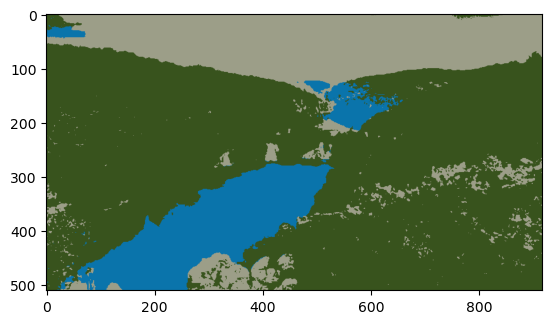

In [11]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

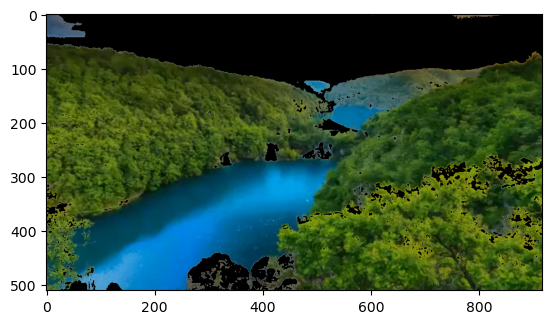

In [12]:
# disable only the cluster number 2 (turn the pixel into black) / remove cluster 1 
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()